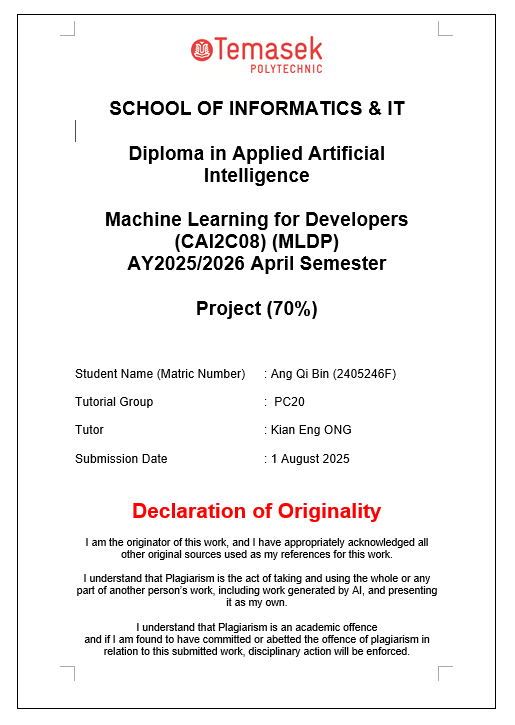


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# this are the necessary Python libraries such as NumPy, Pandas, Matplotlib, Seaborn, 
# and several modules from Scikit-learn were imported to handle data manipulation, visualization, and model building.

In [20]:
df = pd.read_csv("hour.csv")
pd.read_csv("hour.csv")

# The dataset hour.csv, which contains hourly bike rental data in Washington DC, 
# was loaded into a Pandas DataFrame for analysis.


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [21]:
df.describe()
#A descriptive statistical summary of the dataset was generated, providing information such as the count, mean, 
# standard deviation, minimum, and maximum values for each column. 
# This helped in understanding the overall structure and spread of the data.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [22]:
cols_to_drop = [col for col in ['instant', 'dteday', 'casual', 'registered', 'year'] if col in df.columns]
df.drop(cols_to_drop, axis=1, inplace=True)

#Irrelevant columns such as instant, dteday, casual, and registered were removed, 
# since they were not useful for the modeling task and would not affect the final results.

In [23]:
categorical = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical:
    df[col] = df[col].astype("category")

 # Categorical variables including season, mnth, hr, holiday, weekday, workingday,
 #  and weathersit were converted into categorical data types so that they could be properly interpreted during model building.

In [24]:
X = df.drop(['hr'],axis=1).to_numpy()
y = df['hr'].to_numpy()

train_size = 0.7
random_state = 8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size,random_state=random_state)

# The dataset was then split into training and testing sets, with 70% used for training and 30% used for testing, 
# to ensure that model performance could be evaluated on unseen data

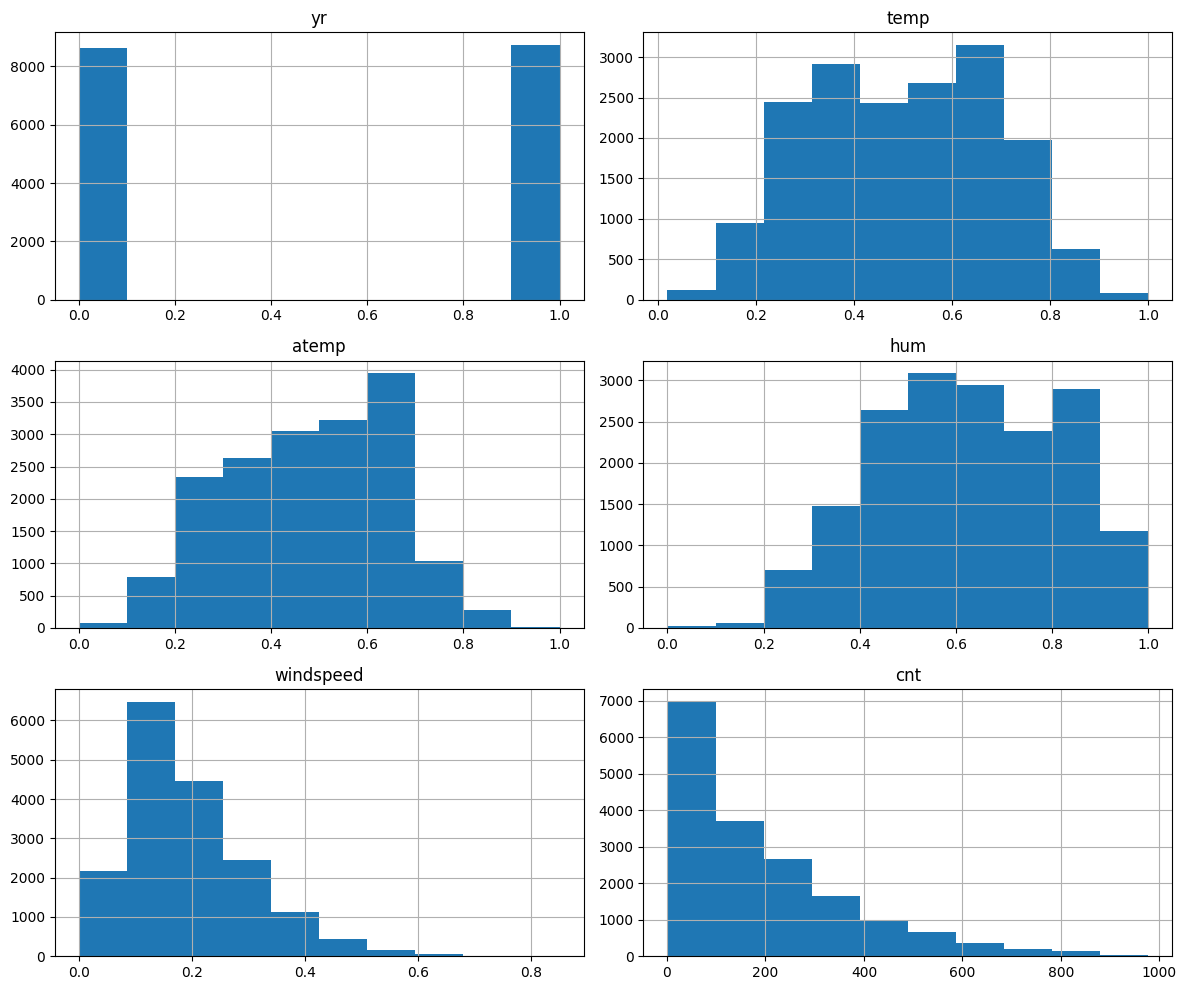

In [25]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Histograms of the dataset were plotted to visualize the distribution of variables, 
# making it easier to identify patterns and data characteristics.


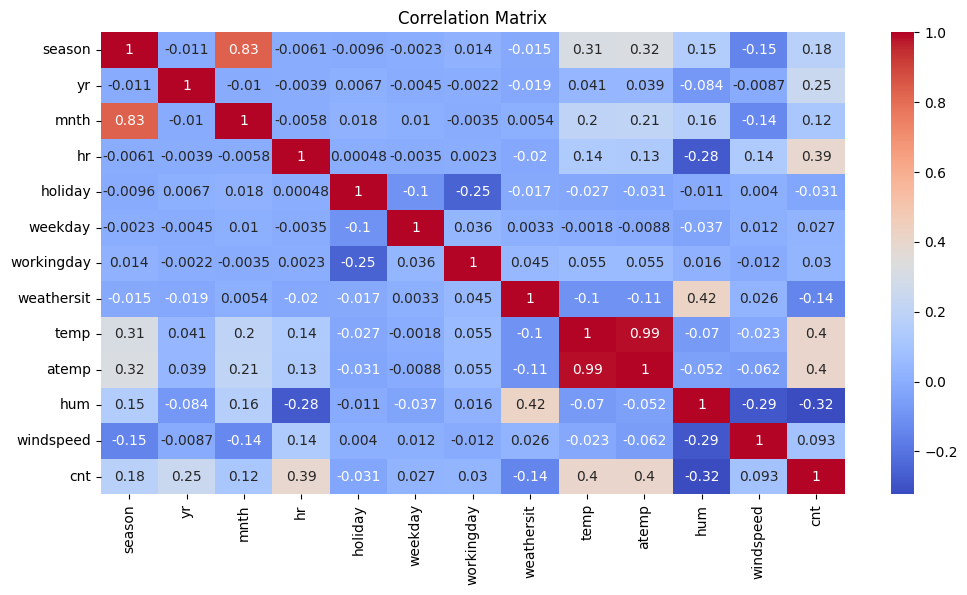

In [26]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# A correlation heatmap was created to examine the relationships between numerical variables, which provided insights into potential dependencies useful for feature selection and model choice.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardization was applied to the training and testing data using StandardScaler to normalize the features, which helps improve the performance and stability of machine learning models.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# A Linear Regression model was trained on the scaled training data and used to make predictions on the test set

In [29]:
print("Linear Regression:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# The model was evaluated using R² Score and Root Mean Squared Error (RMSE), which provided an indication of how well the regression line explained the variance in the dataset and the average prediction error.

Linear Regression:
R2 Score: 0.21001096913982498
RMSE: 6.174911511130016


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Additional models were imported for comparison, including Decision Tree Regressor, Random Forest Regressor, 
# and Support Vector Regressor (SVR), along with tools for hyperparameter tuning such as GridSearchCV

In [31]:
rf_params = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None]
}
rf =RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)

rf_best = rf_grid.best_estimator_
rf_preds = rf_best.predict(X_test)
print("Random Forest Best Params:", rf_grid.best_params_)
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_preds)))
print("Random Forest R^2:", r2_score(y_test, rf_preds))

# A Random Forest model was trained and optimized using grid search with different numbers of estimators 
# and tree depths.The best parameters were selected, and the model’s performance was evaluated with RMSE and R² score.

Random Forest Best Params: {'max_depth': None, 'n_estimators': 100}
Random Forest RMSE: 4.726479571202063
Random Forest R^2: 0.5371554496627378


In [32]:
dt_params = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeRegressor(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=3, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

dt_best = dt_grid.best_estimator_
dt_preds = dt_best.predict(X_test)
print("Decision Tree Best Params:", dt_grid.best_params_)
import numpy as np
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, dt_preds)))
print("Decision Tree R^2:", r2_score(y_test, dt_preds))

# A Decision Tree model was also optimized using grid search, 
# testing different maximum depths and minimum sample splits. 
# The best performing tree was chosen and its performance was reported with RMSE and R² score.

Decision Tree Best Params: {'max_depth': 5, 'min_samples_split': 5}
Decision Tree RMSE: 5.271232398324405
Decision Tree R^2: 0.4243163277642623


In [33]:
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

svr_params = {
    'svr__kernel': ['rbf', 'linear'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5]
}
svr_grid = GridSearchCV(svr_pipeline, svr_params, cv=3, scoring='neg_mean_squared_error')
svr_grid.fit(X_train, y_train)

svr_best = svr_grid.best_estimator_
svr_preds = svr_best.predict(X_test)
print("SVR Best Params:", svr_grid.best_params_)
print("SVR RMSE:", np.sqrt(mean_squared_error(y_test, svr_preds)))
print("SVR R^2:", r2_score(y_test, svr_preds))

# A Support Vector Regression model was built using a pipeline that included scaling and SVR. Different kernels, 
# regularization values (C), and epsilon values were tested through grid search to find the best configuration. 
# The selected model was then evaluated with RMSE and R² score.

SVR Best Params: {'svr__C': 10, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf'}
SVR RMSE: 5.389676259464183
SVR R^2: 0.39815460355258214


In [34]:
dt_model = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)

# A final Decision Tree model was fitted with a maximum depth of 10 and a minimum sample split of 5. 
# This model was trained on the full training data to check how well it performed on the test set.

DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

In [35]:
print("Decision Tree R^2:", r2_score(y_test, dt_model.predict(X_test)))

# The Decision Tree model was evaluated again by reporting its R² score, 
# providing a measure of how much variance in the target variable was explained by the model.

Decision Tree R^2: 0.38096362321478305


In [36]:
import joblib
joblib.dump(dt_model,'dt_model.pkl')

# Finally, the trained Decision Tree model was saved into a file (dt_model.pkl) using Joblib, 
# so it could be reused later without needing to retrain it from scratch.

['dt_model.pkl']